In [1]:
#Task 1 Dataset Selection
import os
import zipfile
import requests

def download_and_extract_dataset(url, output_dir):
    """
    Downloads and extracts a dataset from a given URL.

    Parameters:
    - url: The URL where the dataset is located
    - output_dir: The directory where the dataset will be stored
    """
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)
    
    # Dataset filename
    dataset_zip_path = os.path.join(output_dir, "cats_and_dogs_filtered.zip")
    
    # Download the dataset
    print("Downloading dataset...")
    response = requests.get(url)
    with open(dataset_zip_path, 'wb') as file:
        file.write(response.content)
    print("Download complete.")

    # Extract the dataset
    print("Extracting dataset...")
    with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
        zip_ref.extractall(output_dir)
    print("Extraction complete.")
    
    # Optionally remove the zip file after extraction
    os.remove(dataset_zip_path)
    print("Cleaned up zip file.")

if __name__ == "__main__":
    # URL for the dataset
    dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
    
    # Output directory
    output_directory = "datasets/cats_and_dogs_filtered"
    
    # Download and extract the dataset
    download_and_extract_dataset(dataset_url, output_directory)


Download complete.
Extracting dataset...
Extraction complete.
Cleaned up zip file.


In [7]:
#Task 2: Data Preprocessing 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Corrected paths to the dataset directories
base_dir = 'datasets/cats_and_dogs_filtered/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Print the directory paths to confirm they are correct
print("Train directory:", train_dir)
print("Validation directory:", validation_dir)

# Load the dataset using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=20,
    class_mode='binary'  # Binary classification (cats vs. dogs)
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)


Train directory: datasets/cats_and_dogs_filtered/cats_and_dogs_filtered\train
Validation directory: datasets/cats_and_dogs_filtered/cats_and_dogs_filtered\validation
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build a simple CNN model
model = models.Sequential([
    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Fourth convolutional block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and fully connected layer
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Summary of the model architecture
model.summary()


c:\Users\anish\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

Task 3: Implement CNN Without Data Augmentation 

In [11]:
# Compile the model
#Step 3.1
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [19]:
#Step 3.2
import tensorflow as tf
print(tf.__version__)


2.17.0


In [20]:
#Step 3.3
history = model.fit(
    train_generator,
    epochs=1,  # Test with a single epoch
    validation_data=validation_generator
)


100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 344ms/step - accuracy: 0.5680 - loss: 0.6780 - val_accuracy: 0.6580 - val_loss: 0.6179


In [21]:
#3.4
x_batch, y_batch = next(train_generator)
print(f'Sample batch shape: {x_batch.shape}, labels shape: {y_batch.shape}')


Sample batch shape: (20, 150, 150, 3), labels shape: (20,)


In [24]:
#Task 4: Data Augmentation  and Task 5
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define ImageDataGenerators without augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

# Calculate steps per epoch and validation steps
batch_size = 20
steps_per_epoch = train_generator.samples // batch_size
validation_steps = validation_generator.samples // batch_size

print(f'Steps per epoch: {steps_per_epoch}, Validation steps: {validation_steps}')

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=1,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Validation Loss: {val_loss:.4f}')

# Predict labels on the validation set
validation_generator.reset()  # Ensure the generator is at the start
Y_pred = model.predict(validation_generator, steps=validation_steps, verbose=1)
y_pred = np.round(Y_pred).astype(int)

# Get the true labels
y_true = validation_generator.classes

# Classification report
print(classification_report(y_true, y_pred, target_names=['Cat', 'Dog']))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Steps per epoch: 100, Validation steps: 50
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 336ms/step - accuracy: 0.4970 - loss: 0.9512 - val_accuracy: 0.5350 - val_loss: 0.6896
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.5302 - loss: 0.6878
Validation Accuracy: 0.5350
Validation Loss: 0.6896
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step
              precision    recall  f1-score   support

         Cat       0.50      0.92      0.64       500
         Dog       0.44      0.06      0.11       500

    accuracy                           0.49      1000
   macro avg       0.47      0.49      0.38      1000
weighted avg       0.47      0.49      0.38      1000

Confusion Matrix:
[[460  40]
 [469  31]]


In [25]:
#6.1
from tensorflow.keras import layers, models

# Define a more complex CNN model
model_experiment = models.Sequential([
    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Fourth convolutional block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Flatten and fully connected layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer to reduce overfitting
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Summary of the model architecture
model_experiment.summary()


c:\Users\anish\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 15, 15, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,454,529 (13.18 MB)

 Trainable params: 3,453,825 (13.18 MB)

 Non-trainable params: 704 (2.75 KB)

In [29]:
#Task 6: Experiment with Different CNN Architectures and Hyperparameters 
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD, RMSprop

# Define a more complex CNN model
model_experiment = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer to reduce overfitting
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model with Adam optimizer
model_experiment.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
# Define and compile the same model with SGD optimizer
model_sgd = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model_sgd.compile(
    optimizer=SGD(learning_rate=0.01),  # Adjust learning rate as needed
    loss='binary_crossentropy',
    metrics=['accuracy']
)
# Define and compile the same model with RMSprop optimizer
model_rmsprop = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model_rmsprop.compile(
    optimizer=RMSprop(learning_rate=0.001),  # Adjust learning rate as needed
    loss='binary_crossentropy',
    metrics=['accuracy']
)
# Define training parameters
batch_size = 20
epochs = 20
steps_per_epoch = train_generator.samples // batch_size
validation_steps = validation_generator.samples // batch_size

# Train and evaluate the model with complex architecture
history_experiment = model_experiment.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=1,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

val_loss_exp, val_accuracy_exp = model_experiment.evaluate(validation_generator)
print(f'Validation Accuracy (Experiment Model): {val_accuracy_exp:.4f}')
print(f'Validation Loss (Experiment Model): {val_loss_exp:.4f}')

# Train and evaluate models with different optimizers
history_sgd = model_sgd.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=1,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

history_rmsprop = model_rmsprop.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=1,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

val_loss_sgd, val_accuracy_sgd = model_sgd.evaluate(validation_generator)
val_loss_rmsprop, val_accuracy_rmsprop = model_rmsprop.evaluate(validation_generator)

print(f'Validation Accuracy (SGD Model): {val_accuracy_sgd:.4f}')
print(f'Validation Loss (SGD Model): {val_loss_sgd:.4f}')
print(f'Validation Accuracy (RMSprop Model): {val_accuracy_rmsprop:.4f}')
print(f'Validation Loss (RMSprop Model): {val_loss_rmsprop:.4f}')


100/100 ━━━━━━━━━━━━━━━━━━━━ 54s 466ms/step - accuracy: 0.6065 - loss: 1.9597 - val_accuracy: 0.5010 - val_loss: 1.4907
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.4798 - loss: 1.5487
Validation Accuracy (Experiment Model): 0.5010
Validation Loss (Experiment Model): 1.4907
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 406ms/step - accuracy: 0.5498 - loss: 1.1205 - val_accuracy: 0.5000 - val_loss: 1.1720
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 452ms/step - accuracy: 0.5585 - loss: 3.4233 - val_accuracy: 0.5000 - val_loss: 2.5012
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.5210 - loss: 1.1293
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.4907 - loss: 2.5511
Validation Accuracy (SGD Model): 0.5000
Validation Loss (SGD Model): 1.1720
Validation Accuracy (RMSprop Model): 0.5000
Validation Loss (RMSprop Model): 2.5012


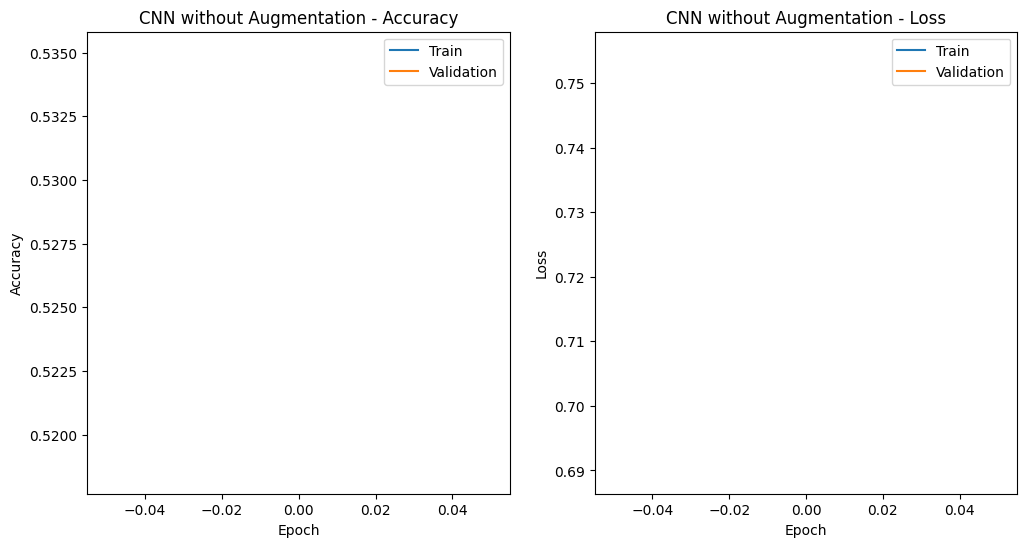

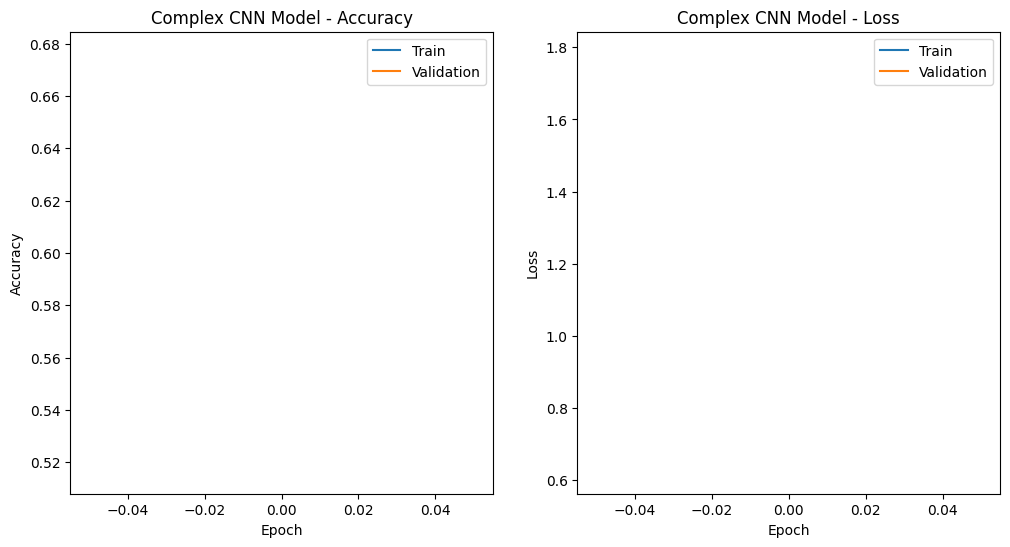

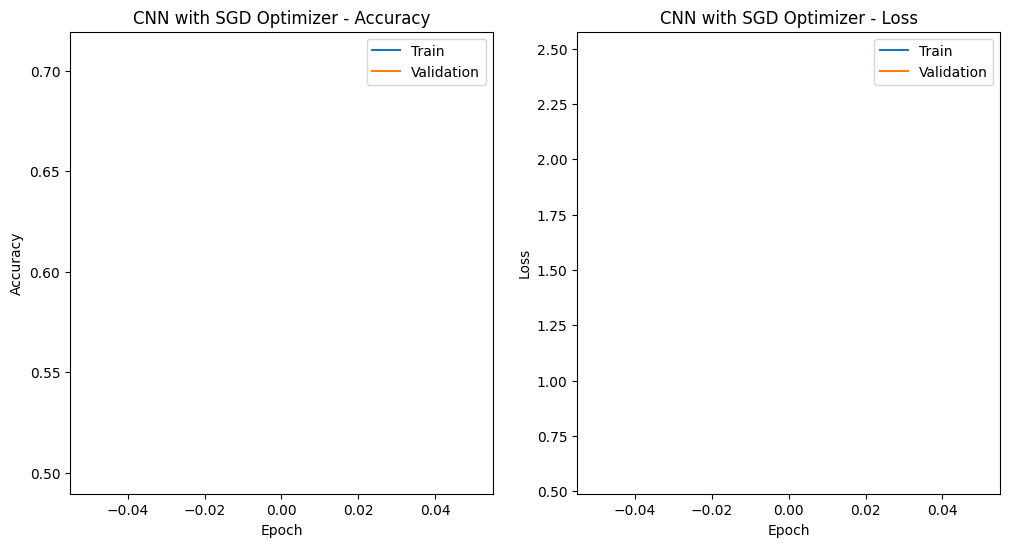

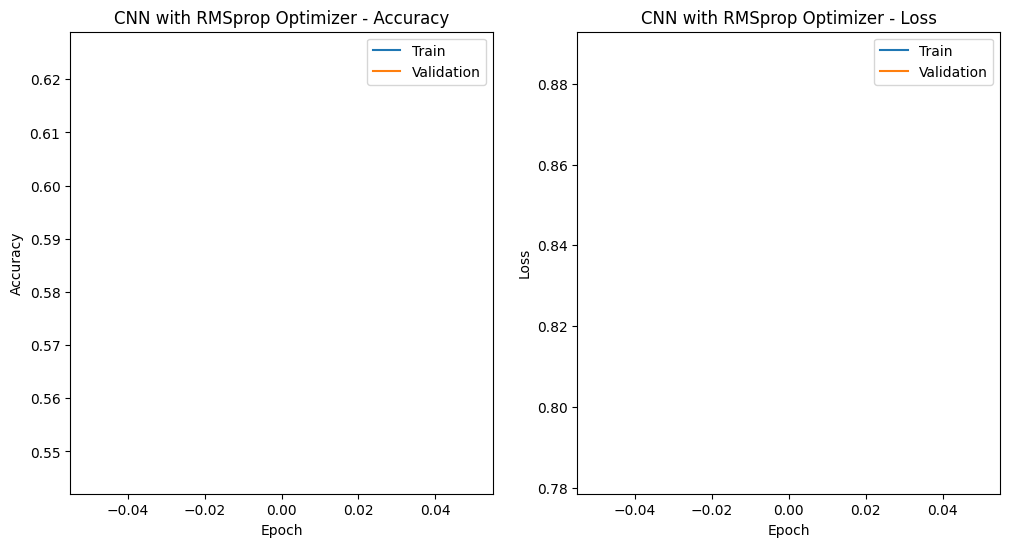

In [35]:
#Task 7: Comparison and Reporting 
import matplotlib.pyplot as plt
import numpy as np

# Extract metrics from the training history of each model
def plot_history(history, title):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'])

    plt.show()

# Assuming you have history objects for different models
plot_history(history, 'CNN without Augmentation')
plot_history(history_experiment, 'Complex CNN Model')
plot_history(history_sgd, 'CNN with SGD Optimizer')
plot_history(history_rmsprop, 'CNN with RMSprop Optimizer')


50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - accuracy: 0.5235 - loss: 1.7292
Complex CNN Model - Validation Accuracy: 0.5160
Complex CNN Model - Validation Loss: 1.7848
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step
Complex CNN Model - Classification Report:
              precision    recall  f1-score   support

         Cat       0.50      0.99      0.66       500
         Dog       0.56      0.02      0.03       500

    accuracy                           0.50      1000
   macro avg       0.53      0.50      0.35      1000
weighted avg       0.53      0.50      0.35      1000



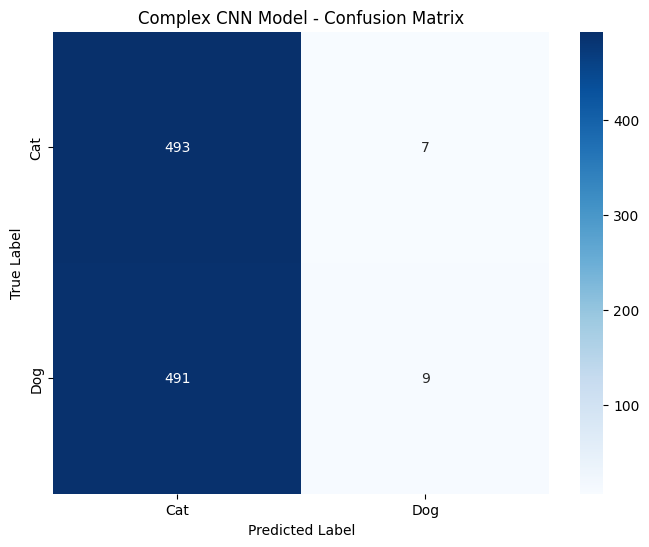

50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.5132 - loss: 2.4175
CNN with SGD Optimizer - Validation Accuracy: 0.5000
CNN with SGD Optimizer - Validation Loss: 2.4817
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step
CNN with SGD Optimizer - Classification Report:
              precision    recall  f1-score   support

         Cat       0.50      1.00      0.67       500
         Dog       0.00      0.00      0.00       500

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50      0.33      1000



c:\Users\anish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

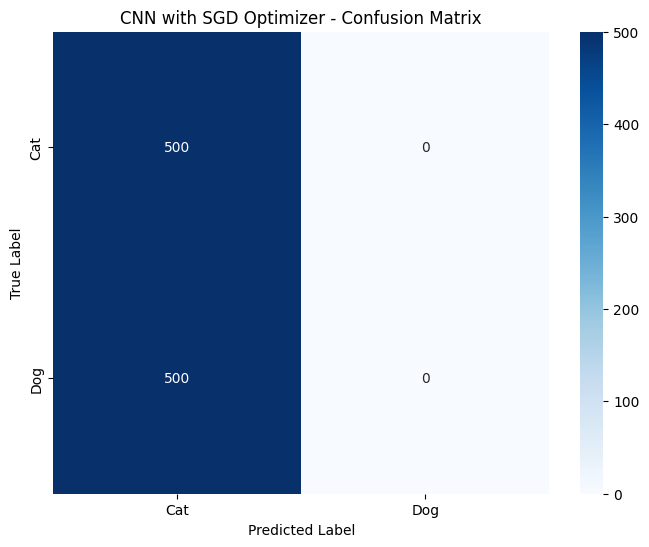

50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.5427 - loss: 0.8723
CNN with RMSprop Optimizer - Validation Accuracy: 0.5460
CNN with RMSprop Optimizer - Validation Loss: 0.8876
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step
CNN with RMSprop Optimizer - Classification Report:
              precision    recall  f1-score   support

         Cat       0.52      0.38      0.44       500
         Dog       0.51      0.64      0.57       500

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.50      1000
weighted avg       0.51      0.51      0.50      1000



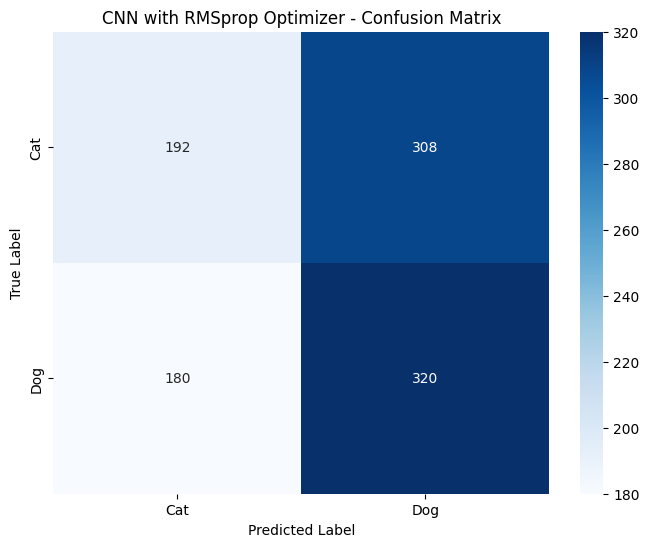

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, title):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# For each model
def evaluate_model(model, validation_generator, title):
    val_loss, val_accuracy = model.evaluate(validation_generator)
    print(f'{title} - Validation Accuracy: {val_accuracy:.4f}')
    print(f'{title} - Validation Loss: {val_loss:.4f}')

    # Predict labels on the validation set
    Y_pred = model.predict(validation_generator)
    y_pred = (Y_pred > 0.5).astype(int)

    # Get the true labels
    y_true = validation_generator.classes

    # Classification report
    print(f'{title} - Classification Report:')
    print(classification_report(y_true, y_pred, target_names=['Cat', 'Dog']))

    # Confusion matrix
    plot_confusion_matrix(y_true, y_pred, f'{title} - Confusion Matrix')

# Evaluate and plot for each model
evaluate_model(model_experiment, validation_generator, 'Complex CNN Model')
evaluate_model(model_sgd, validation_generator, 'CNN with SGD Optimizer')
evaluate_model(model_rmsprop, validation_generator, 'CNN with RMSprop Optimizer')
